In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy,sys,os
import pandas as pd
from importlib import reload
from tqdm import tqdm_notebook
from tqdm import tqdm

%config InlineBackend.figure_format = "svg"
import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

from sims.models import *
import sims.evolutionary_dynamics as ED
reload(ED)

<module 'sims.evolutionary_dynamics' from '/Users/elevien/Dropbox (Dartmouth College)/RESEARCH/age_structure_evolutionary_dynamics/code/single_cell_evolution/sims/evolutionary_dynamics.py'>

# Test on Markovian model

In [4]:
def divide(gt,params,sp):
    tau_avg1,tau_avg2 = params[0],params[1]
    if sp ==0:
        gt1 = np.random.exponential(tau_avg1)
        gt2 = np.random.exponential(tau_avg1)
    else:
        gt1 = np.random.exponential(tau_avg2)
        gt2 = np.random.exponential(tau_avg2)
    return gt1,gt2

N = 50
tol = 10e-3

In [ ]:
s_range = np.linspace(0.05,2,20)
pfix = []
for s in tqdm(s_range):
    div_params = [1,1/(1+s)]
    pfixs,err,k = ED.fixation(N,divide,tol,div_params =div_params)
    pfix.append(pfixs)

 90%|███████████████████████████████████████████████████████████▍      | 18/20 [13:09<01:46, 53.45s/it]

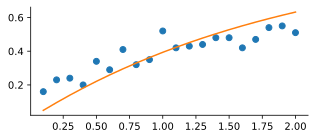

In [13]:
fig,ax = plt.subplots(figsize=(5,2))

def kimura(s,N):
    return (1-np.exp(-s))/(1-np.exp(-s*N))
ax.plot(s_range,pfix,"o")
ax.plot(s_range,[kimura(s/2,N) for s in s_range])

# Fixation probabilities for gamma model

In [ ]:
def divide(gt,params,tp): # in this model generation times are uncorrelated and exponentially distributed
    alpha1 = params[0]
    beta1 = params[1]
    alpha2 = params[0]
    beta2 = params[1]
    if tp == 1:
        gt1 =  np.random.gamma(alpha1, beta1)
        gt2 =  np.random.gamma(alpha1, beta1)
    else:
        gt1 =  np.random.gamma(alpha2, beta2)
        gt2 =  np.random.gamma(alpha2, beta2)
    return gt1,gt2

In [ ]:
s_range = np.linspace(0.05,2,20)
pfix = []
for s in tqdm(s_range):
    alpha1 = 1.0/cv**2*s
    beta1 = (2**cv**2-1)/1.
    alpha2 = 1.0/cv**2*s
    beta2 = (2**cv**2-1)/(1.+s)
    div_params = [1,1/(1+s)]
    
    
    
    pfixs,err,k = ED.fixation(N,divide,tol,div_params =div_params)
    pfix.append(pfixs)